In [63]:
import tensorflow as tf
from tensorflow import keras

import os
import cv2 as cv
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

import inpaint

In [88]:
## For more information into formulation: https://www.youtube.com/watch?v=AZr64OxshLo
## Metric
def dice_coef(y_true, y_pred):
    y_true_f = keras.backend.flatten(y_true)
    y_pred_f = keras.backend.flatten(y_pred)
    intersection = keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (keras.backend.sum(y_true_f + y_pred_f))

model = tf.keras.models.load_model('model2.h5', custom_objects={"dice_coef": dice_coef})

def showImg(img) :
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 1, 1)
    plt.imshow(img)
    plt.title("")    
    plt.show()
    
def plotImg(img_set, dim=(4, 4), figsize=(20, 20)) :
    count = 0
    plt.figure(figsize=figsize)
    for i in range(dim[0]) :
        for j in range(dim[1]) :
            plt.subplot(dim[0], dim[1], count + 1)
            plt.imshow(img_set[count % len(img_set)])
            plt.title("")
            count += 1
    plt.show()

# ==================================================================== #

model = tf.keras.models.load_model('model2.h5', custom_objects={"dice_coef": dice_coef})

def scale(data: np.array, from_range = (0, 255), to_range = (0, 1), dtype=np.float64) -> np.array :
    return np.array(((data - from_range[0]) / (from_range[1] - from_range[0])) * (to_range[1] - to_range[0]) + to_range[0], dtype=dtype)

def remove_watermark(input_img) :
    return model.predict(np.expand_dims(input_img, axis=0))[0]
def resizeImg(img) :
    return cv.resize(img, (32, 32))

def resizeMask(mask) :
    return cv.resize(mask, (32, 32), interpolation=cv.INTER_NEAREST)

def formatMask(img, mask) :
    return scale(resizeImg(img) & resizeMask(mask))

14
14


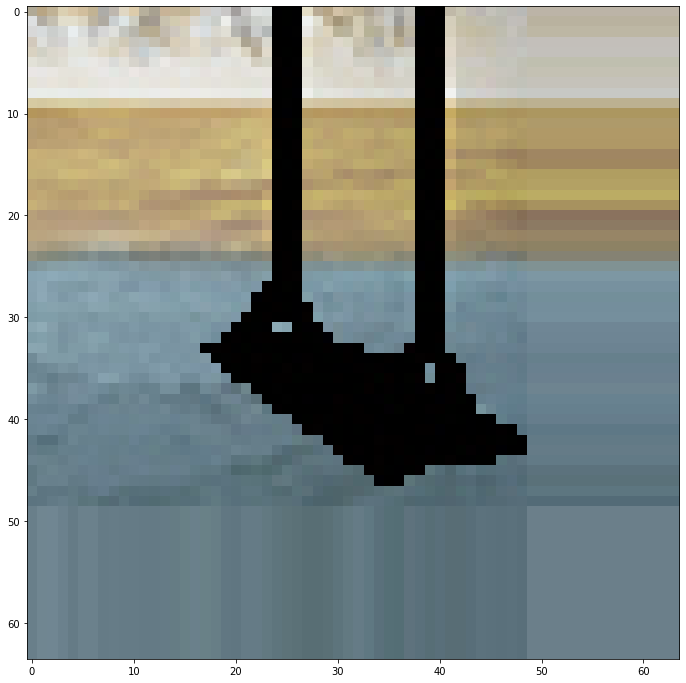

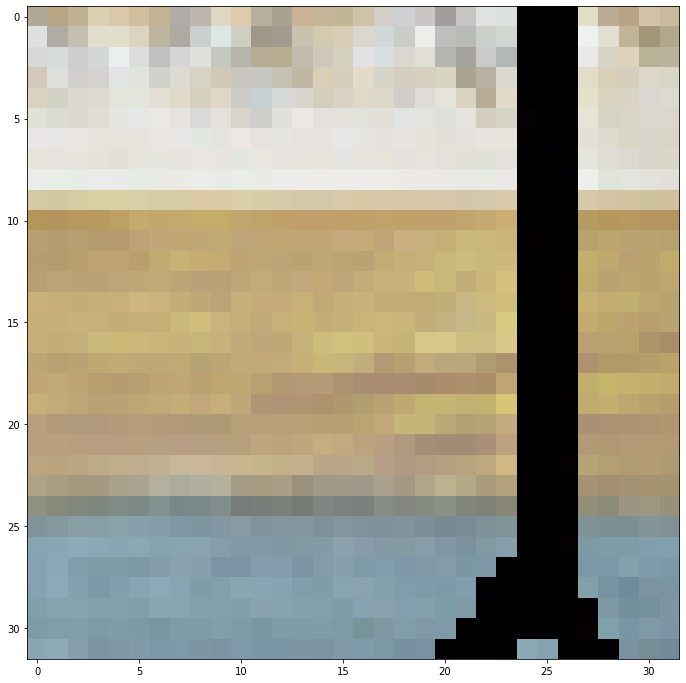

1/1 [==============================] - 0s 23ms/step


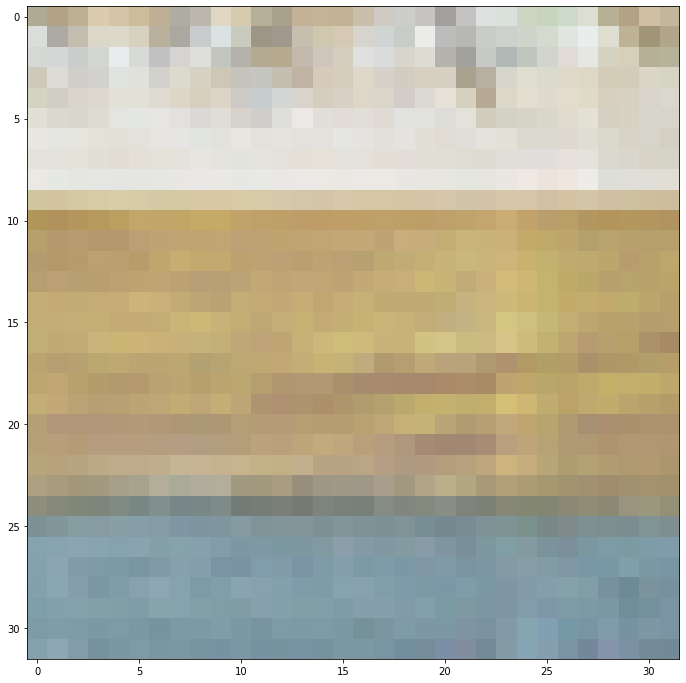

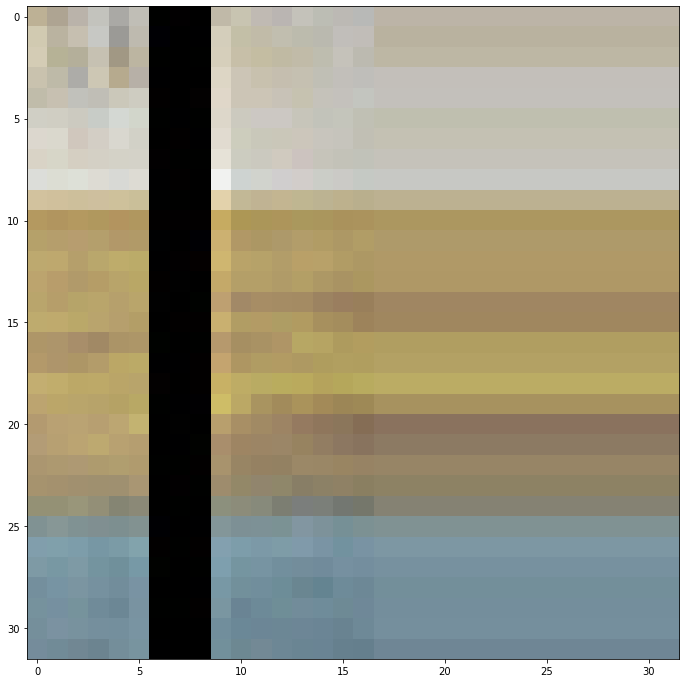

1/1 [==============================] - 0s 40ms/step


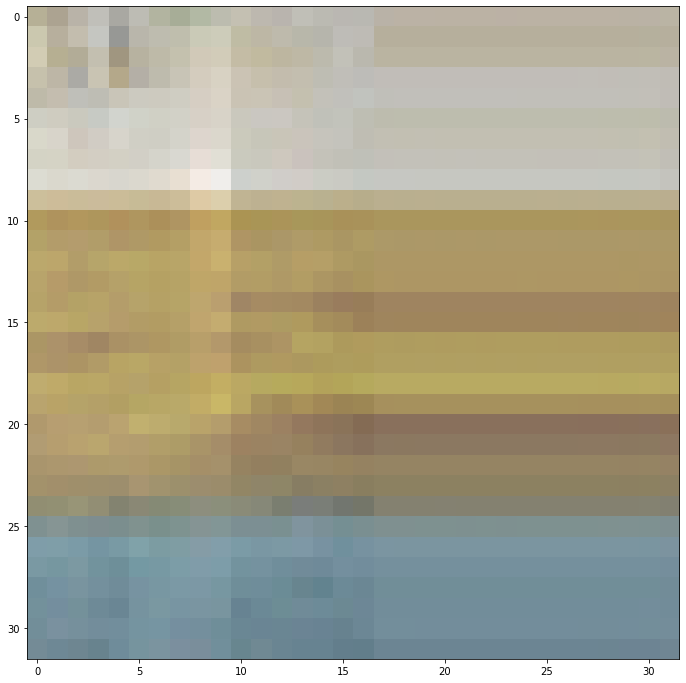

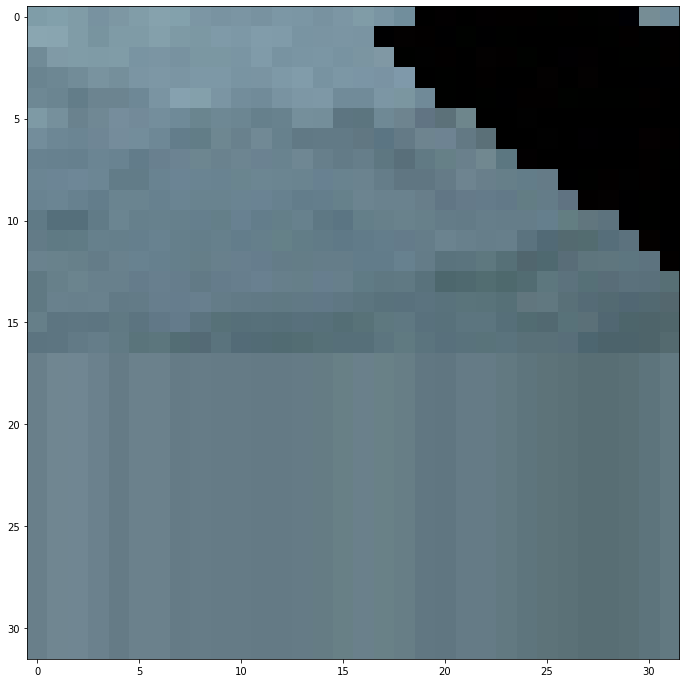

1/1 [==============================] - 0s 23ms/step


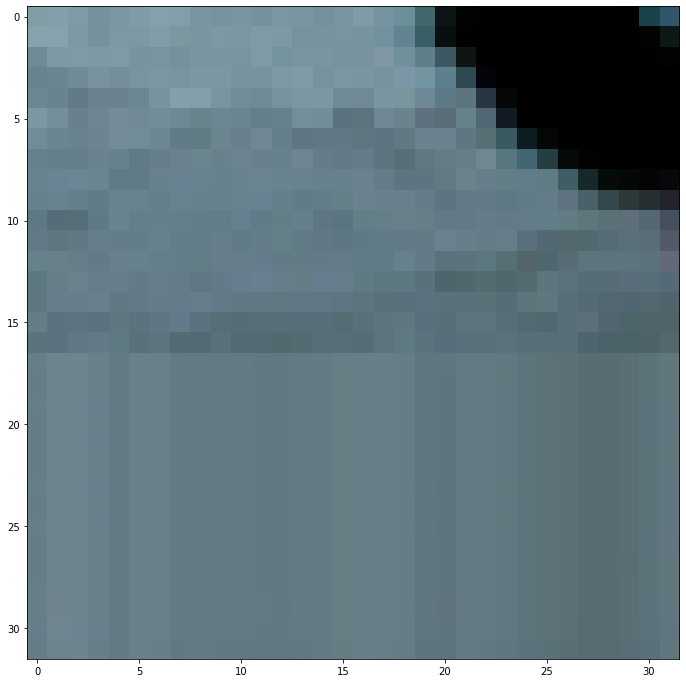

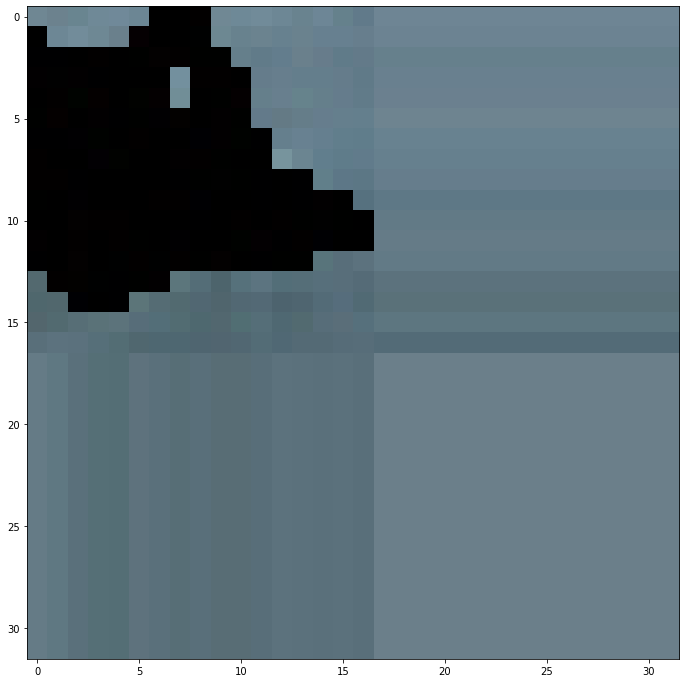

1/1 [==============================] - 0s 24ms/step


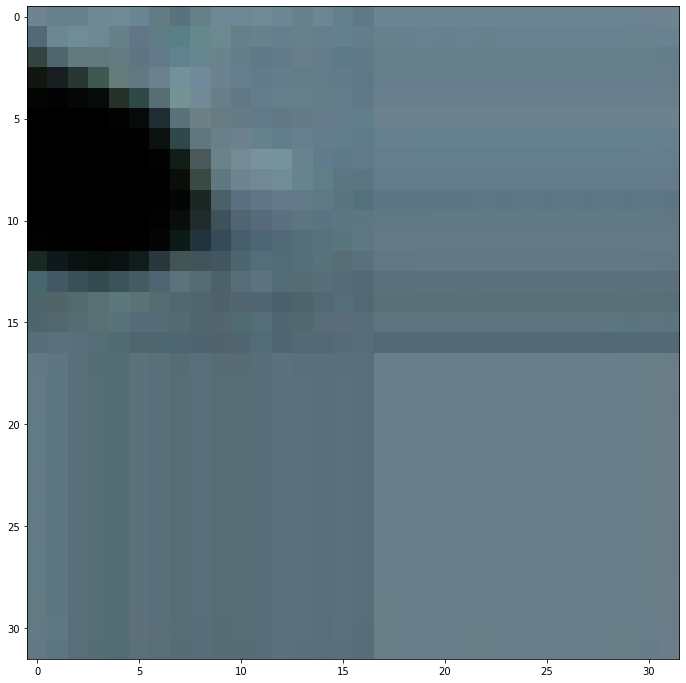

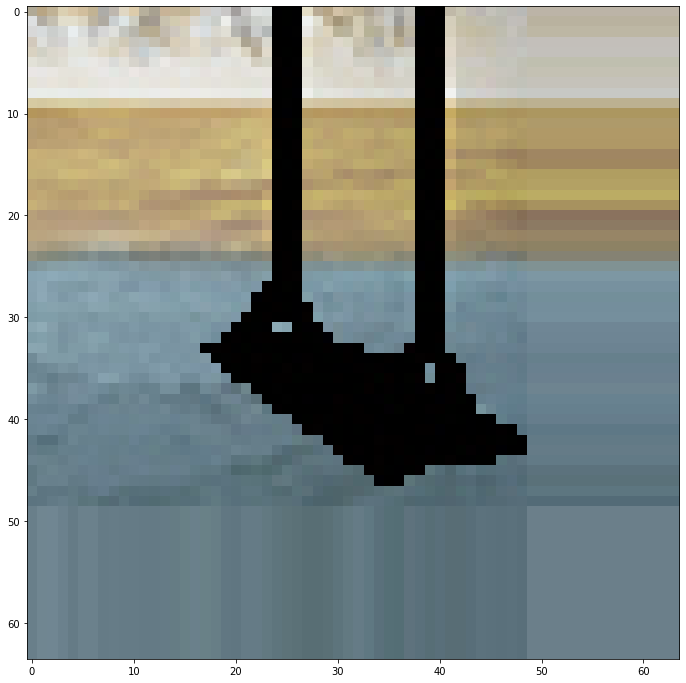

In [104]:
img = scale(cv.imread('D:\\Temp\\Swing50mask.jpg'))
# img_ = remove_watermark(img)
# print(img_)
# plotImg([img[:,:,::-1], img_[:,:,::-1]], (1, 2))

expand_width = 0
expand_height = 0
if img.shape[0] % 32 != 0 :
    expand_height = 32 - (img.shape[0] % 32)
    print(expand_height)
if img.shape[1] % 32 != 0 :
    expand_width = 32 - (img.shape[1] % 32)
    print(expand_width)
    
# img_expand = cv.copyMakeBorder(img, 0, expand_height, 0, expand_width, cv.BORDER_REFLECT)
img_expand = cv.copyMakeBorder(img, 0, expand_height, 0, expand_width, cv.BORDER_REPLICATE)
showImg(img_expand)

h_step = img_expand.shape[0] // 32
w_step = img_expand.shape[1] // 32
for y in range(h_step) :
    for x in range(w_step) :
        showImg(img_expand[y*32:(y+1)*32, x*32:(x+1)*32])
        showImg(remove_watermark(img_expand[y*32:(y+1)*32, x*32:(x+1)*32]))
        # img_expand[y*32:(y+1)*32, x*32:(x+1)*32] = remove_watermark(img_expand[y*32:(y+1)*32, x*32:(x+1)*32])
        
showImg(img_expand)